In [1]:
from SOH_func_scaler import *
import matplotlib.pyplot as pl
from keras import models, layers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import datetime
import os

%load_ext tensorboard

In [2]:
VERSION = 'Scaler_Parallel_Dropout0.1_Dense'

FILE_00 = 'data_csv/CYCLE_CSV_data00.csv'
FILE_01 = 'data_csv/CYCLE_CSV_data01.csv'
FILE_02 = 'data_csv/CYCLE_CSV_data02.csv'
FILE_03 = 'data_csv/CYCLE_CSV_data03.csv'
FILE_04 = 'data_csv/CYCLE_CSV_data04.csv'
FILE_05 = 'data_csv/CYCLE_CSV_data05.csv'
FILE_06 = 'data_csv/CYCLE_CSV_data06.csv'

In [3]:
drop_labels_x = ['인덱스', '사이클_번호', '누적_용량(Ah)', '누적_에너지(Wh)', '쿨롱_효율(%)', '에너지_효율(%)', '최대_전압(V)', '충전_최종전압(V)', '단위_충전_용량(Ah/g)', '방전_최종전압(V)', '단위_방전_용량(Ah/g)']
drop_labels_y = ['인덱스', '사이클_번호', '충전_용량(Ah)', '누적_용량(Ah)', '충전_에너지(Wh)', '방전_에너지(Wh)', '누적_에너지(Wh)', '쿨롱_효율(%)', '에너지_효율(%)', '최대_전압(V)', '충전_최종전압(V)', '방전_최종전압(V)', '단위_충전_용량(Ah/g)', '방전_최종전압(V)', '단위_방전_용량(Ah/g)']

param = {'seq_len' : 20, 'num_units' : 64, 'num_filters' : 64, 'window' : 3, 'dropout': 0.1, 'num_epochs' : 2000, 'num_dense': 16}

log_dir = f"logs/{VERSION}/" + datetime.datetime.now().strftime("%Y%m%d-%H%M") + f'-{param["num_filters"]}FL-{param["num_units"]}UN-{param["num_epochs"]}EP-{param["seq_len"]}SQ'
file_path = f'Checkpoints\{VERSION}\SOH_Checkpoint\{param["num_filters"]}FL-{param["num_units"]}UN-{param["num_epochs"]}EP-{param["seq_len"]}SQ.h5'
hist_freq = 250

save_path = f'outputs\{VERSION}\{param["num_filters"]}FL-{param["num_units"]}UN-{param["num_epochs"]}EP-{param["seq_len"]}SQ'
try:
    if not os.path.exists(save_path):
        os.makedirs(save_path)
except OSError:
    print('Error Creating Directory...')

Index(['충전_용량(Ah)', '방전_용량(Ah)', '충전_에너지(Wh)', '방전_에너지(Wh)'], dtype='object')
Index(['방전_용량(Ah)'], dtype='object')
data_csv/CYCLE_CSV_data00.csv => (475, 4)


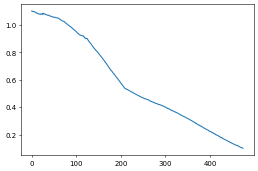

Index(['충전_용량(Ah)', '방전_용량(Ah)', '충전_에너지(Wh)', '방전_에너지(Wh)'], dtype='object')
Index(['방전_용량(Ah)'], dtype='object')
data_csv/CYCLE_CSV_data01.csv => (515, 4)


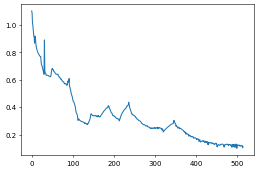

Index(['충전_용량(Ah)', '방전_용량(Ah)', '충전_에너지(Wh)', '방전_에너지(Wh)'], dtype='object')
Index(['방전_용량(Ah)'], dtype='object')
data_csv/CYCLE_CSV_data02.csv => (515, 4)


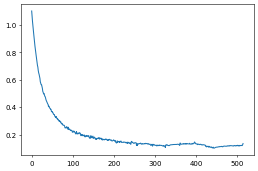

Index(['충전_용량(Ah)', '방전_용량(Ah)', '충전_에너지(Wh)', '방전_에너지(Wh)'], dtype='object')
Index(['방전_용량(Ah)'], dtype='object')
data_csv/CYCLE_CSV_data05.csv => (515, 4)


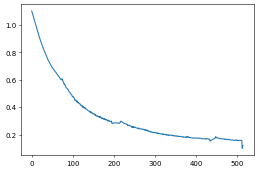

Index(['충전_용량(Ah)', '방전_용량(Ah)', '충전_에너지(Wh)', '방전_에너지(Wh)'], dtype='object')
Index(['방전_용량(Ah)'], dtype='object')
data_csv/CYCLE_CSV_data04.csv => (515, 4)


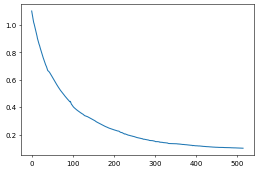

In [4]:
data00, data_cap00 = get_data(FILE_00, drop_labels_x, drop_labels_y)
data01, data_cap01 = get_data(FILE_01, drop_labels_x, drop_labels_y)
data02, data_cap02 = get_data(FILE_02, drop_labels_x, drop_labels_y)
data04, data_cap04 = get_data(FILE_05, drop_labels_x, drop_labels_y)
data_test, data_cap_test = get_data(FILE_04, drop_labels_x, drop_labels_y)

In [5]:
x_train00 = seq_gen_x(data00, param['seq_len'])
y_train00 = seq_gen_y(data_cap00, param['seq_len'])
x_train01 = seq_gen_x(data01, param['seq_len'])
y_train01 = seq_gen_y(data_cap01, param['seq_len'])
x_train02 = seq_gen_x(data02, param['seq_len'])
y_train02 = seq_gen_y(data_cap02, param['seq_len'])
x_train04 = seq_gen_x(data04, param['seq_len'])
y_train04 = seq_gen_y(data_cap04, param['seq_len'])
x_test = seq_gen_x(data_test, param['seq_len'])
y_test = seq_gen_y(data_cap_test, param['seq_len'])
print(x_train00.shape)
print(y_train00.shape)
print(x_train00[0:5, :, 1])
print(y_train00[:4])

(455, 20, 4)
(455, 1, 1)
[[1.1       1.0982642 1.0979633 1.0960112 1.0969539 1.0957274 1.0937734
  1.0943558 1.0917381 1.0887    1.0856507 1.087547  1.0847241 1.0821105
  1.0815271 1.0787675 1.0772533 1.0776246 1.078723  1.0770457]
 [1.0982642 1.0979633 1.0960112 1.0969539 1.0957274 1.0937734 1.0943558
  1.0917381 1.0887    1.0856507 1.087547  1.0847241 1.0821105 1.0815271
  1.0787675 1.0772533 1.0776246 1.078723  1.0770457 1.0746659]
 [1.0979633 1.0960112 1.0969539 1.0957274 1.0937734 1.0943558 1.0917381
  1.0887    1.0856507 1.087547  1.0847241 1.0821105 1.0815271 1.0787675
  1.0772533 1.0776246 1.078723  1.0770457 1.0746659 1.0793054]
 [1.0960112 1.0969539 1.0957274 1.0937734 1.0943558 1.0917381 1.0887
  1.0856507 1.087547  1.0847241 1.0821105 1.0815271 1.0787675 1.0772533
  1.0776246 1.078723  1.0770457 1.0746659 1.0793054 1.078867 ]
 [1.0969539 1.0957274 1.0937734 1.0943558 1.0917381 1.0887    1.0856507
  1.087547  1.0847241 1.0821105 1.0815271 1.0787675 1.0772533 1.0776246
  1.07

In [6]:
inputs = layers.Input(shape=(None, x_train00.shape[-1]), name = 'Inputs')
x1 = layers.Conv1D(param['num_filters'], param['window'], padding='causal')(inputs)
x2 = layers.LSTM(param['num_units'], return_sequences = True)(inputs)
x = layers.concatenate([x1, x2])
x = layers.LSTM(16)(x)
x = layers.Dropout(param['dropout'])(x)
outputs = layers.Dense(1)(x)
model = models.Model(inputs = inputs, outputs = outputs, name = 'CNN_LSTM_PARALLEL')
model.compile(loss = 'mse', optimizer = 'Adam')
model.summary()

# RNN 2 layers
# RNN 병렬

Model: "CNN_LSTM_PARALLEL"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None, None, 4)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, None, 64)     832         ['Inputs[0][0]']                 
                                                                                                  
 lstm (LSTM)                    (None, None, 64)     17664       ['Inputs[0][0]']                 
                                                                                                  
 concatenate (Concatenate)      (None, None, 128)    0           ['conv1d[0][0]',                 
                                                                  'lstm[0][0]']   

In [7]:
BATCH_SIZE = 32
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
                 TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
fitdata = model.fit(x_train00, y_train00, epochs=param['num_epochs'], verbose = 2, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=callback_list)
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
                 TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
fitdata = model.fit(x_train01, y_train01, epochs=param['num_epochs'], verbose = 2, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=callback_list)
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
                 TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
fitdata = model.fit(x_train02, y_train02, epochs=param['num_epochs'], verbose = 2, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=callback_list)
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
                 TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
fitdata = model.fit(x_train04, y_train04, epochs=param['num_epochs'], verbose = 2, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=callback_list)

Epoch 1/2000
12/12 - 7s - loss: 0.0418 - val_loss: 1.0089e-04 - 7s/epoch - 599ms/step
Epoch 2/2000
12/12 - 0s - loss: 0.0134 - val_loss: 0.0027 - 114ms/epoch - 10ms/step
Epoch 3/2000
12/12 - 0s - loss: 0.0085 - val_loss: 0.0074 - 120ms/epoch - 10ms/step
Epoch 4/2000
12/12 - 0s - loss: 0.0086 - val_loss: 0.0026 - 136ms/epoch - 11ms/step
Epoch 5/2000
12/12 - 0s - loss: 0.0077 - val_loss: 9.0408e-04 - 112ms/epoch - 9ms/step
Epoch 6/2000
12/12 - 0s - loss: 0.0066 - val_loss: 0.0038 - 113ms/epoch - 9ms/step
Epoch 7/2000
12/12 - 0s - loss: 0.0068 - val_loss: 4.2747e-04 - 120ms/epoch - 10ms/step
Epoch 8/2000
12/12 - 0s - loss: 0.0062 - val_loss: 4.4828e-04 - 111ms/epoch - 9ms/step
Epoch 9/2000
12/12 - 0s - loss: 0.0089 - val_loss: 0.0012 - 156ms/epoch - 13ms/step
Epoch 10/2000
12/12 - 0s - loss: 0.0058 - val_loss: 8.1858e-04 - 113ms/epoch - 9ms/step
Epoch 11/2000
12/12 - 0s - loss: 0.0050 - val_loss: 8.6204e-05 - 135ms/epoch - 11ms/step
Epoch 12/2000
12/12 - 0s - loss: 0.0073 - val_loss: 5.05

16/16 [==============================] - 0s 7ms/step
(495, 1)
outputs\Scaler_Parallel_Dropout0.1_Dense\64FL-64UN-2000EP-20SQ


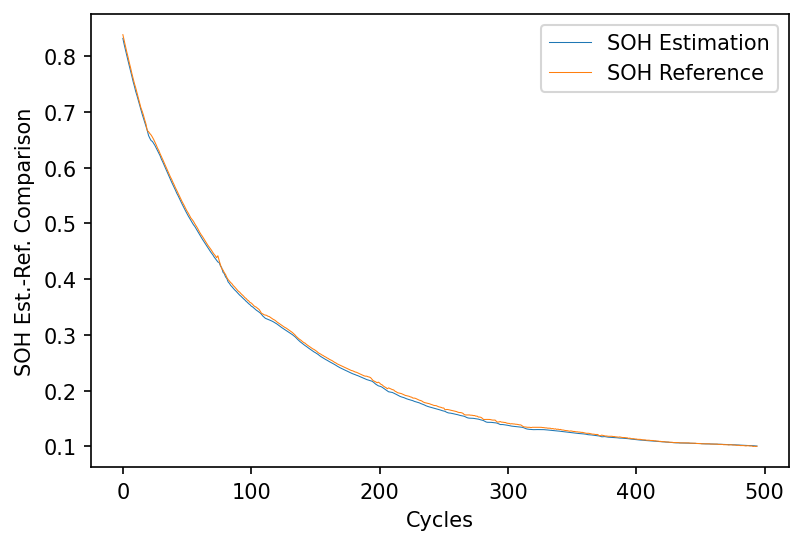

In [8]:
RMSE, MAE, Error_rate = show_and_prove(model, file_path, x_test, y_test, save_path, return_loss=True)

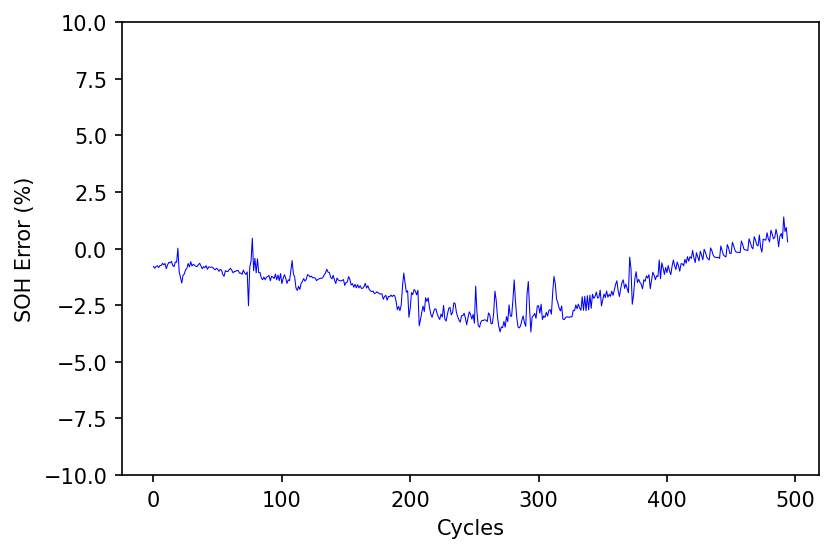

RMSE(0.003985), MAE(0.003478)


In [9]:
pl.figure(dpi=150)
line = pl.plot(Error_rate)
pl.ylim(-10, 10)
pl.ylabel('SOH Error (%)')
pl.xlabel('Cycles')
pl.setp(line, color='b', linewidth=0.5)
pl.savefig(f'{save_path}\\ErrRate-RMSE({RMSE:.4f})MAE({MAE:.4f}).png')
pl.show()
print(f'RMSE({RMSE:.6f}), MAE({MAE:.6f})')